In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
def read_data(file_name, ncol):
    df = pd.read_csv(file_name, sep='\s+', header=None)
    return df.values.reshape(-1, ncol)


def plot_comparison(x, y, tgt_x, tgt_y, x_label, y_label):
    plt.figure(figsize=(6, 6))
    plt.plot(x, y, 'o', markersize=2.5, label='All Rates')
    plt.plot(tgt_x, tgt_y, 'o', markersize=2.5, label='Target Rates')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

def molchan_diagram(cell_rate, target_rate, title="", top_left=""):
    ntgt = len(target_rate)
    ncell = len(cell_rate)
    crsorted = np.sort(cell_rate)[::-1]
    ass = 0
    sumnum = np.zeros_like(crsorted)

    for i in range(len(crsorted)):
        sumnum[i] = np.sum(target_rate <= crsorted[i])
        ass += (1 - sumnum[i] / (ntgt + 1)) / (ncell + 1)

    prop_space_occupied = np.arange(1, ncell + 1) / (ncell + 1)
    prop_unpredicted_eq = sumnum / (ntgt + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(prop_space_occupied, prop_unpredicted_eq, label='Molchan Trajectory')
    plt.plot([0, 1], [1, 0], linestyle='--', label='Random Guess Line')
    plt.xlabel("Proportion of space occupied")
    plt.ylabel("Proportion of unpredicted earthquakes")
    plt.title(title)
    plt.text(-0.15, 1.11, top_left, fontsize=12)
    plt.text(0.8, 0.9, title, fontsize=12)
    plt.text(0.8, 0.75, f"ASS = {round(ass, 2)}", fontsize=10)
    plt.legend()
    plt.savefig(f"./output/Molchan_{title}.png")
    plt.show()

In [4]:
# Read and process the allrates data
allrates = read_data("data/allrates_kenny.dat", 10)
alllat, alllong, allppi, allpmf, allppe, allsst, allrot, alldil = allrates[:, 1:9].T
# Read and process the tgtrates data
tgtrates = read_data("data/targetrates.dat", 10)
tgtlat, tgtlong, tgtppi, tgtpmf, tgtppe, tgtsst, tgtrot, tgtdil = tgtrates[:, 1:9].T


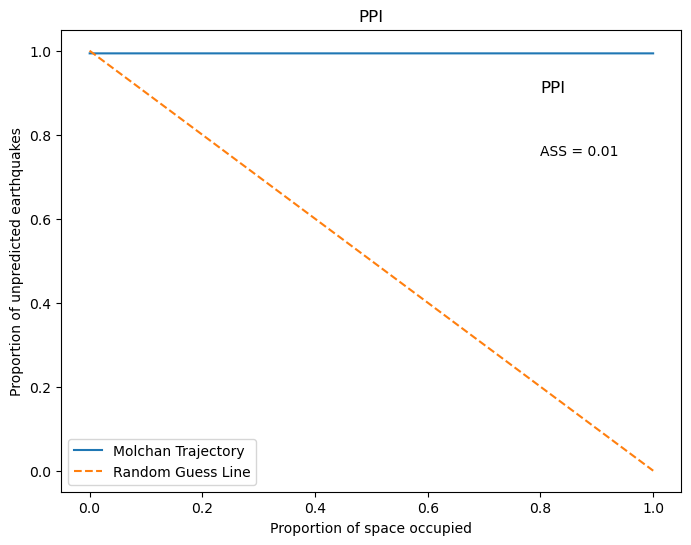

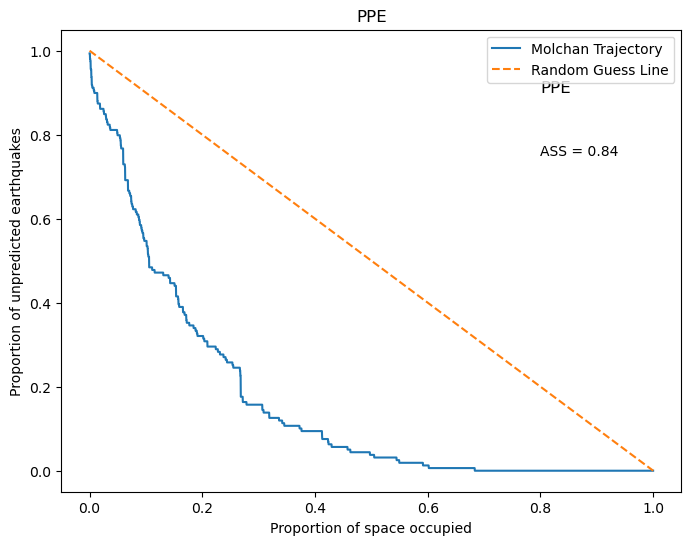

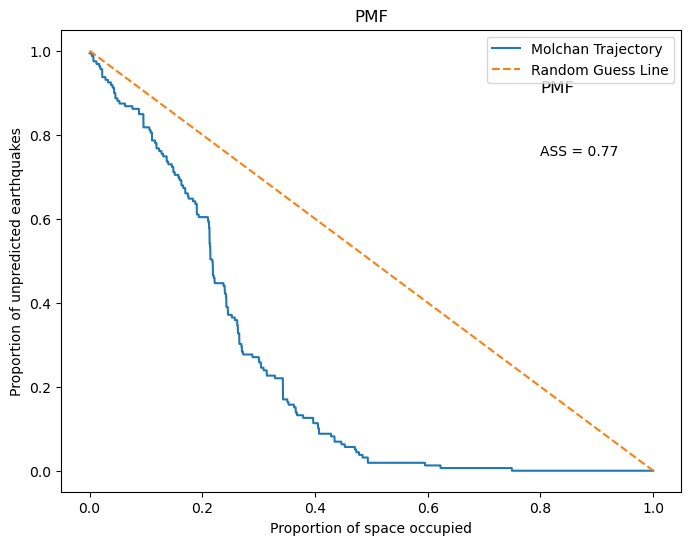

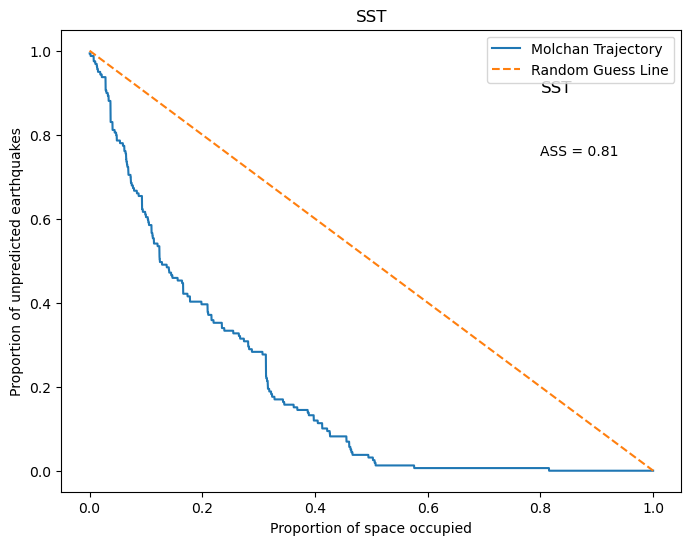

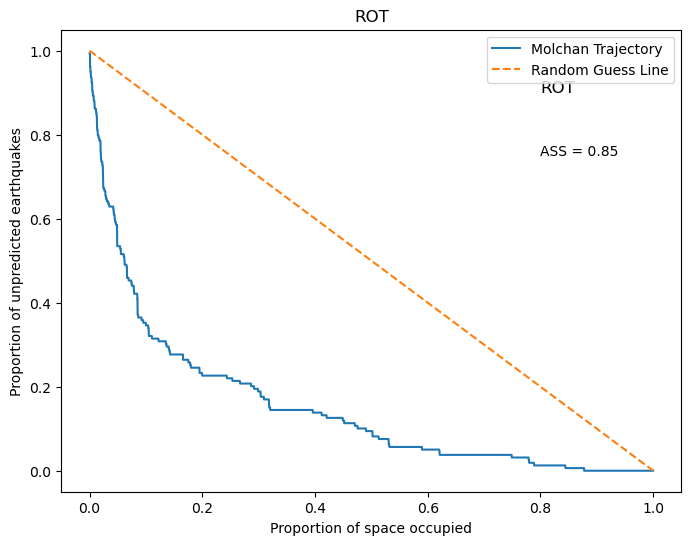

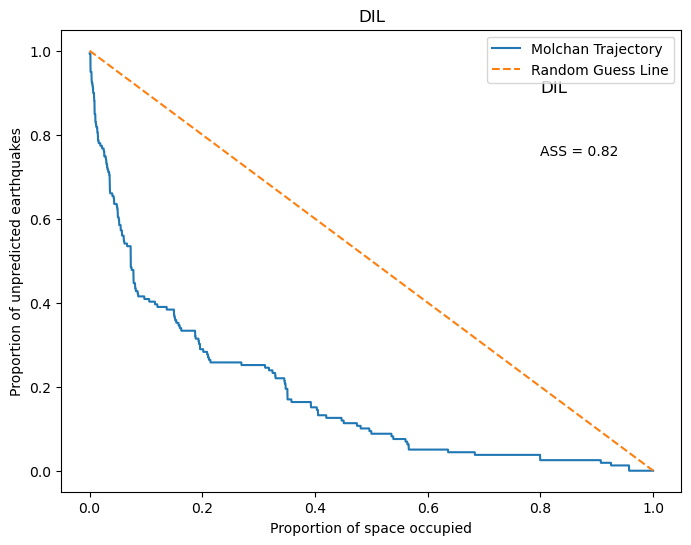

In [8]:
# Molchan diagrams for each variable
molchan_diagram(allppi, tgtppi, "PPI")
molchan_diagram(allppe, tgtppe, "PPE")
molchan_diagram(allpmf, tgtpmf, "PMF")
molchan_diagram(allsst, tgtsst, "SST")
molchan_diagram(allrot, tgtrot, "ROT")
molchan_diagram(alldil, tgtdil, "DIL")

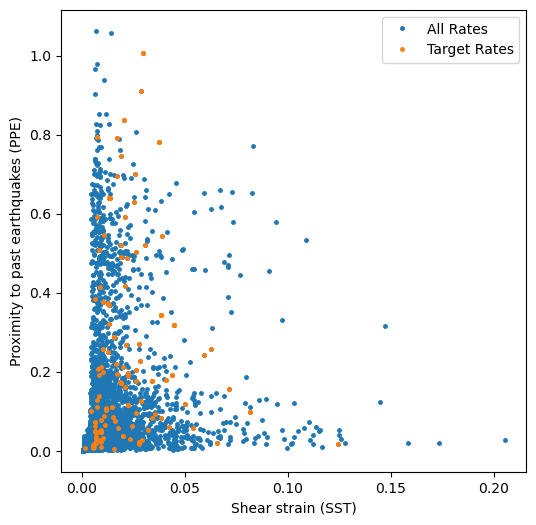

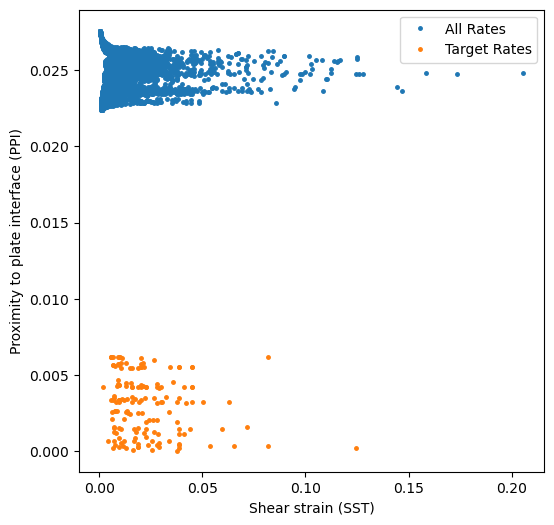

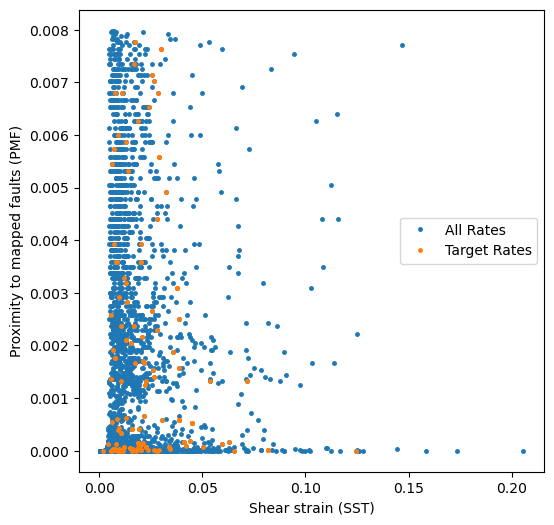

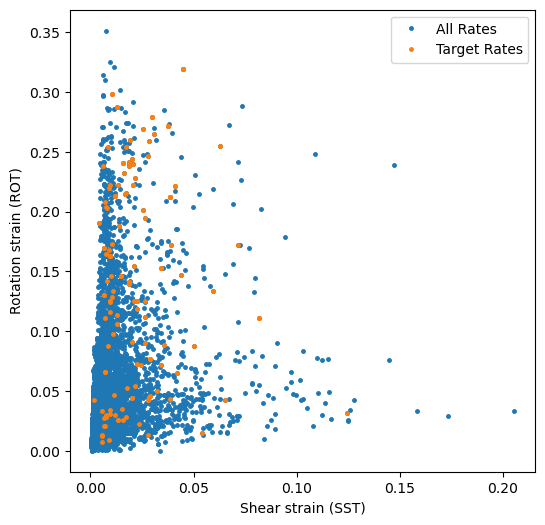

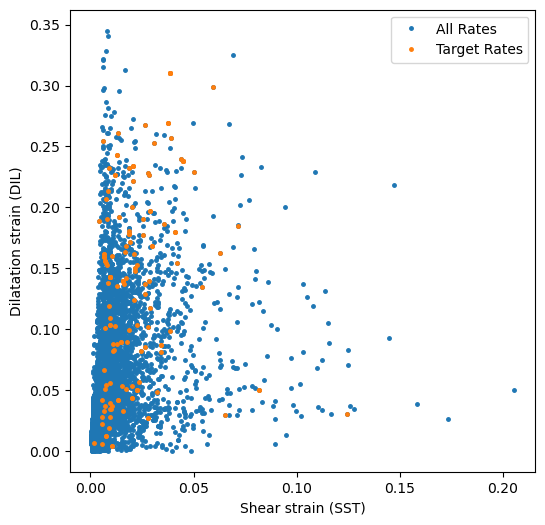

In [6]:
# Plotting comparisons
plot_comparison(allsst, allppe, tgtsst, tgtppe, "Shear strain (SST)", "Proximity to past earthquakes (PPE)")
plot_comparison(allsst, allppi, tgtsst, tgtppi, "Shear strain (SST)", "Proximity to plate interface (PPI)")
plot_comparison(allsst, allpmf, tgtsst, tgtpmf, "Shear strain (SST)", "Proximity to mapped faults (PMF)")
plot_comparison(allsst, allrot, tgtsst, tgtrot, "Shear strain (SST)", "Rotation strain (ROT)")
plot_comparison(allsst, alldil, tgtsst, tgtdil, "Shear strain (SST)", "Dilatation strain (DIL)")
